# Exploration of original cases

In this notebook we explore the characteristics of the original artificial cases datasets. We aim to answer the following questions:
- How many cases are there?
- How long are they?
- How many unique tokens are there?
- Are all of they structured in the same way?

We also have some metadata about the cases containing the MeSH terms in it. We will explore the distribution of these terms in the cases.

In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt

main_path = "data/2_generated/2step_transformation_dt4h_GPT4omini"
lang = "en"
main_path = os.path.join(main_path, lang)

# Data Exploration

## Amount of data

In [2]:
n_cc = len(os.listdir(main_path))
print("There are {} clinical cases".format(n_cc))

There are 1000 clinical cases


In [3]:
def extract_txt(path, filename):
    total_path = os.path.join(path, filename)
    return filename, open(total_path, "r", encoding="utf8Ç").read()

def files_to_df(path, extensions=["txt"]):
    files = [x for x in os.listdir(path) if x.split(".")[-1] in extensions]
    data = [extract_txt(path, f) for f in files]
    return pd.DataFrame(data, columns=["filename", "text"])

df = files_to_df(main_path)

In [4]:
df.head()

,filename,text
0,25350173_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...
1,25531204_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...
2,25654384_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...
3,25679083_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...
4,25725033_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...


In [5]:
df["text_orig"] = df["text"]
df["text"] = df["text_orig"].apply(lambda x: x.split("'text_to_transform': ")[-1][:-1].replace("'", ""))
df

,filename,text,text_orig
0,25350173_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...
1,25531204_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...
2,25654384_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...
3,25679083_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...
4,25725033_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...
...,...,...,...
995,38985686_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...
996,39018148_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...
997,39044225_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...
998,39098903_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...


In [6]:
# Include the number of RoBERTa tokens
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained("gpt2")

c:\Users\alber\Documents\GitHub\MultiSynDS\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'RobertaTokenizer'.


In [14]:
import nltk

df["n_char"] = df["text"].str.len()
df["n_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x))).astype(int)
df["n_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x))).astype(int)
df["n_tokens"] = df["text"].apply(lambda x: len(tokenizer(x)["input_ids"]))
df.head()

,filename,text,text_orig,n_char,n_words,n_tokens,n_sentences
0,25350173_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,2304,410,575,9
1,25531204_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,2939,595,837,19
2,25654384_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,2700,507,734,20
3,25679083_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,2369,456,632,9
4,25725033_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,2354,430,669,11


In [15]:
df[["n_sentences", "n_words", "n_tokens"]].to_csv("nbs/data/en/ds_en_length.csv", index=False)

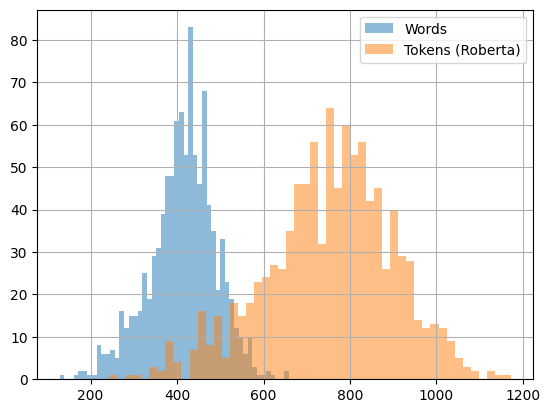

In [15]:
df["n_words"].hist(bins=50, alpha=0.5, label="Words");
df["n_tokens"].hist(bins=50, alpha=0.5, label="Tokens (Roberta)");
plt.legend();

In [16]:
df.describe()

,n_char,n_words,n_tokens
count,1000.000000,1000.000000,1000.000000
mean,2869.209000,413.735000,752.914000
std,541.637009,76.618778,147.161731
min,883.000000,129.000000,243.000000
25%,2548.750000,370.000000,667.000000
50%,2912.500000,420.500000,762.500000
75%,3226.000000,463.000000,851.250000
max,4476.000000,659.000000,1172.000000


In [17]:
long_docs = df[df["n_words"] > 1500]

for i, row in long_docs.iterrows():
    print(row["filename"])
    print(row["text"])
    print("\n\n")

# Structure exploration

Some fields are created when the report is generated. Some interesting conclusions we can extract from below are:

- Not all the generated discharge summaries have the same amount of fields.
- The fields are usually structured as \*\*Section Name:\*\* followed by the content of the section.
- The content can be structured in different ways, some of them are structured in paragraphs, others in bullet points, etc.
- Unknown content is filled with placeholders like \[Datum van Opname\] instead of making it up
- There is some correlation between the amount of fields and the length of the case because it is possible that most of them have placeholders.

In [18]:
print(df.iloc[1]["text"])

**Discharge Summary**

**Patient Information:**
- Name: [Patient Name]
- Age: 66 years
- Gender: Male
- Admission Date: [Admission Date]
- Discharge Date: [Discharge Date]

**Medical History:**
- Orthotropic heart transplant (2013)
- Dystonic muscular dystrophy type 2
- Recent diagnosis of prostate cancer
- Hypertension
- Chronic kidney disease stage 3

**Presenting Complaints:**
The patient presented with shortness of breath and fatigue. He was found to have biventricular systolic dysfunction and tested positive for COVID-19, although he did not exhibit respiratory symptoms aside from dyspnea on exertion.

**Vital Signs at Admission:**
- Blood Pressure: 128/94 mm Hg
- Heart Rate: 108 beats per minute
- Respiratory Rate: 24 breaths per minute
- Temperature: 37°C
- Oxygen Saturation: 97%

**Clinical Findings:**
The patient reported nausea and had missed his immunosuppressive medications for two days prior to admission. Laboratory results indicated:
- Troponin-I: 0.04 ng/mL (slightly ele

In [19]:
# Seems like all the fields are between ** so let's extract them
df["fields"] = df["text"].str.findall(r"\*\*([^\*]+):\*\*")
df["n_fields"] = df["fields"].str.len()
df

,filename,text,text_orig,n_char,n_words,n_tokens,fields,n_fields
0,36951253_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,4021,556,908,"[Patient Information, Name, Age, Gender, Admis...",16
1,33892935_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,3286,465,808,"[Patient Information, Medical History, Present...",13
2,28960930_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,3729,515,1004,"[Patient Information, Admission Details, Histo...",12
3,29538200_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,2765,410,797,"[Patient Information, Admission Date, Discharg...",20
4,30103814_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,2964,427,777,"[Patient Information, Admission Details, Clini...",10
...,...,...,...,...,...,...,...,...
995,30762762_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,2983,458,866,"[Patient Information, Chief Complaint, Medical...",12
996,27980283_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,2903,420,726,"[Patient Information, Name, Age, Gender, Date ...",16
997,34012203_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,3010,417,800,"[Patient Information, Date of Admission, Date ...",16
998,37828735_4_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,2341,344,645,"[Patient Information, Admission Details, Clini...",11


Text(0.5, 1.0, 'Number of fields in clinical cases')

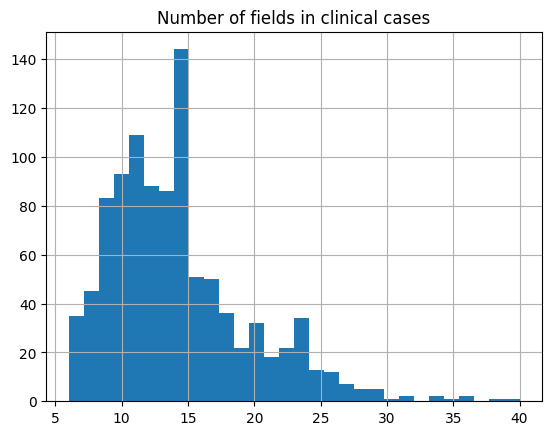

In [20]:
df["n_fields"].hist(bins=30)
plt.title("Number of fields in clinical cases")

In [21]:
df[df["n_fields"] >=50]

,filename,text,text_orig,n_char,n_words,n_tokens,fields,n_fields


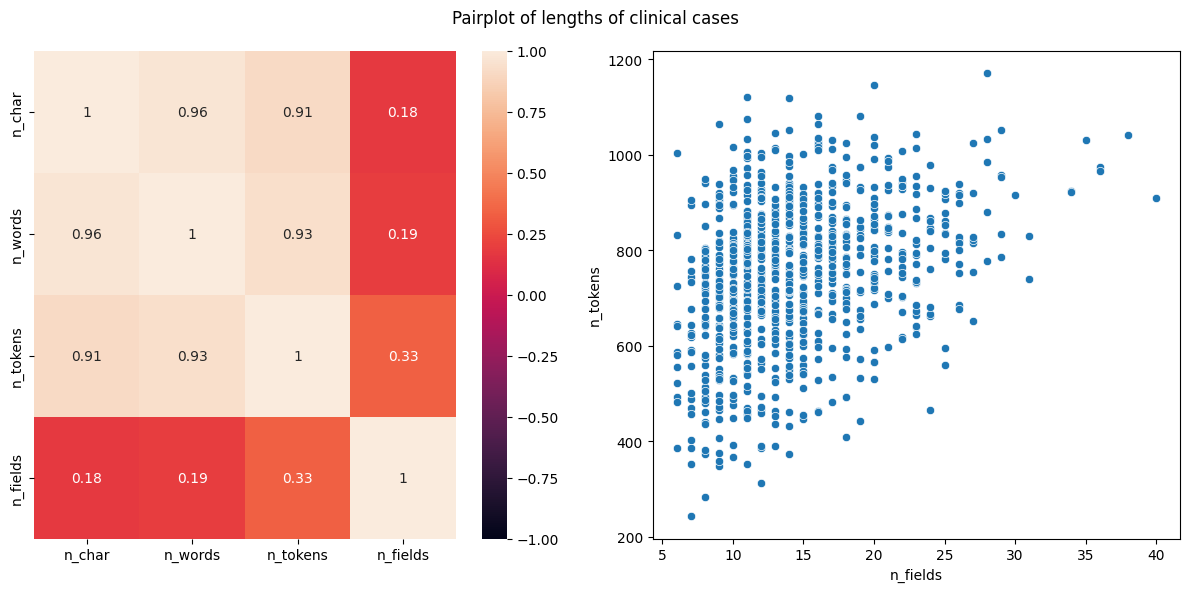

In [24]:
# Heatmap correlation matrix
import seaborn as sns
import numpy as np

cols = ["n_char", "n_words", "n_tokens", "n_fields"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(df[cols].corr(), annot=True, ax=ax[0], vmin=-1, vmax=1)
sns.scatterplot(x="n_fields", y="n_tokens", data=df, ax=ax[1])

plt.suptitle("Pairplot of lengths of clinical cases")
plt.tight_layout()

In [25]:
df["placeholders"] = df["text"].str.findall(r"\[(.+)\]")
df["n_placeholders"] = df["placeholders"].str.len()
df

,filename,text,text_orig,n_char,n_words,n_tokens,fields,n_fields,placeholders,n_placeholders
0,36951253_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,4021,556,908,"[Patient Information, Name, Age, Gender, Admis...",16,"[Patient Name, Admission Date, Discharge Date,...",7
1,33892935_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,3286,465,808,"[Patient Information, Medical History, Present...",13,"[Patient Name, Admission Date, Discharge Date,...",5
2,28960930_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,3729,515,1004,"[Patient Information, Admission Details, Histo...",12,"[Patient Name, Admission Date, Discharge Date,...",6
3,29538200_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,2765,410,797,"[Patient Information, Admission Date, Discharg...",20,"[Patient Name, Admission Date, Discharge Date,...",9
4,30103814_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,2964,427,777,"[Patient Information, Admission Details, Clini...",10,"[Patients Name, Admission Date, Discharge Date...",5
...,...,...,...,...,...,...,...,...,...,...
995,30762762_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,2983,458,866,"[Patient Information, Chief Complaint, Medical...",12,"[Patient Name, Admission Date, Discharge Date,...",5
996,27980283_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,2903,420,726,"[Patient Information, Name, Age, Gender, Date ...",16,"[Patient Name, Admission Date, Discharge Date,...",5
997,34012203_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,3010,417,800,"[Patient Information, Date of Admission, Date ...",16,"[Patients Name, Admission Date, Discharge Date...",9
998,37828735_4_transformed_step1.txt,**Discharge Summary**\n\n**Patient Information...,**Discharge Summary**\n\n**Patient Information...,2341,344,645,"[Patient Information, Admission Details, Clini...",11,"[Patient Name, Admission Date, Discharge Date,...",4


Text(0.5, 1.0, 'Number of placeholders in clinical cases')

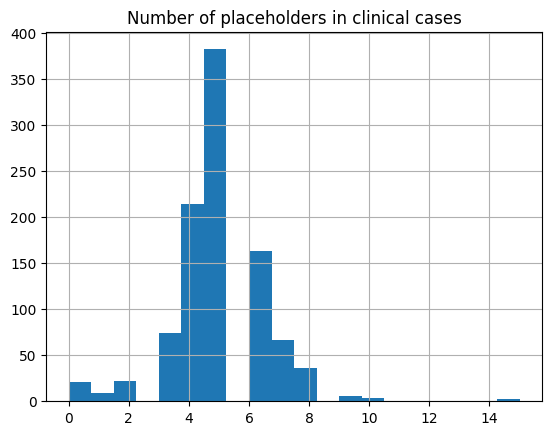

In [26]:
df["n_placeholders"].hist(bins=20)
plt.title("Number of placeholders in clinical cases")

In [27]:
df["cat_ph"] = df["n_placeholders"].apply(lambda x: "0" if x == 0 else "1-5" if x <= 5 else "6-10" if x <= 10 else ">10")

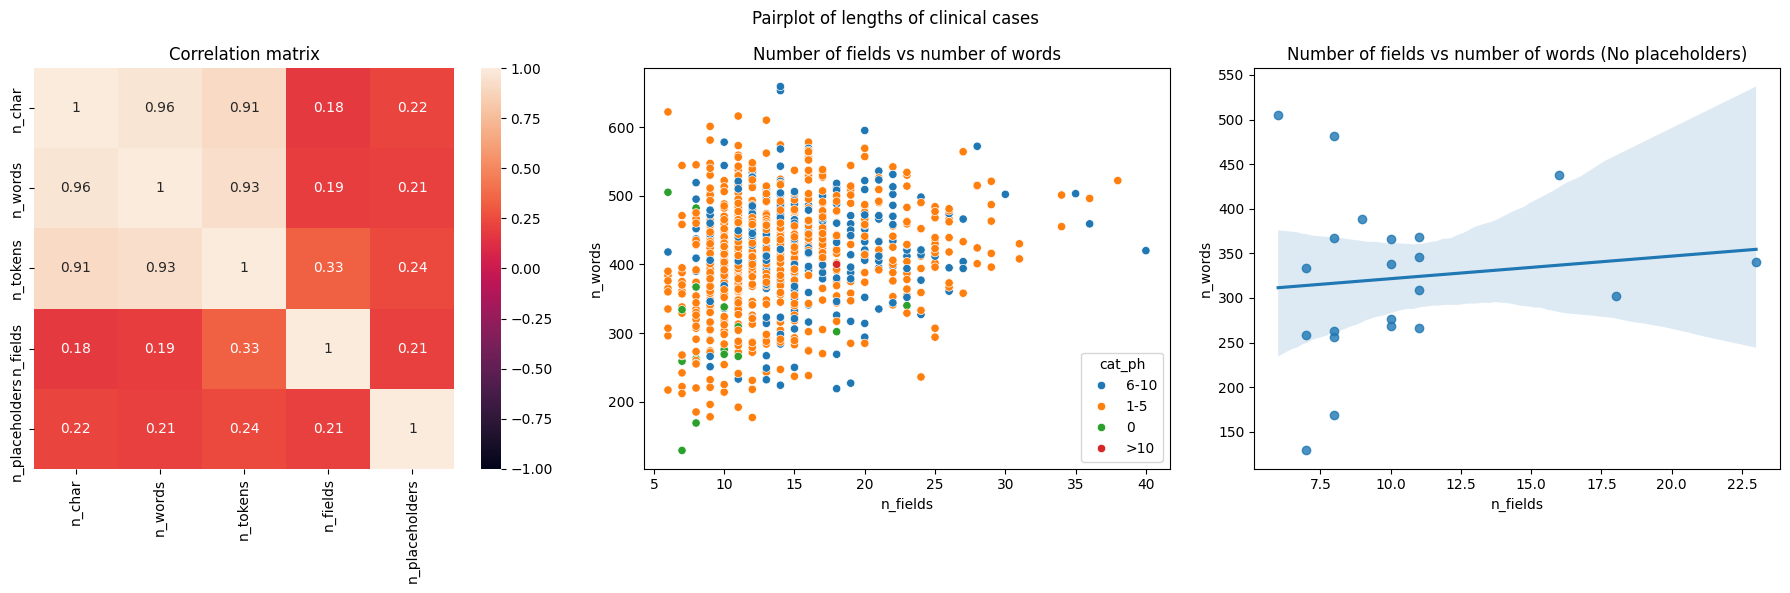

In [29]:
# Heatmap correlation matrix

cols = ["n_char", "n_words", "n_tokens", "n_fields", "n_placeholders"]

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(df[cols].corr(), annot=True, ax=ax[0], vmin=-1, vmax=1)
ax[0].set_title("Correlation matrix")

sns.scatterplot(x="n_fields", y="n_words", data=df, ax=ax[1], hue="cat_ph")
ax[1].set_title("Number of fields vs number of words")

sns.regplot(x="n_fields", y="n_words", data=df[df["n_placeholders"] == 0], ax=ax[2])
ax[2].set_title("Number of fields vs number of words (No placeholders)")

plt.suptitle("Pairplot of lengths of clinical cases")
plt.tight_layout()

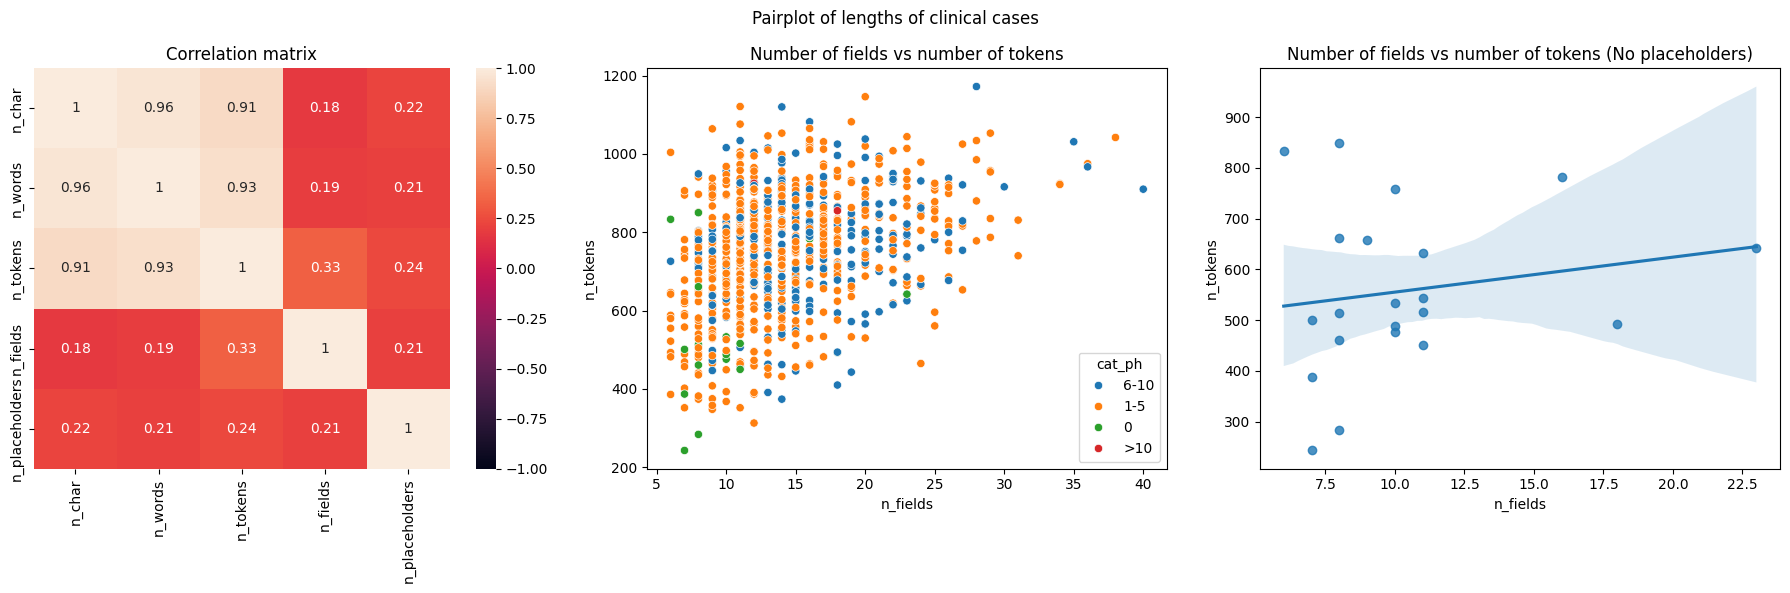

In [30]:
# Heatmap correlation matrix

cols = ["n_char", "n_words", "n_tokens", "n_fields", "n_placeholders"]

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(df[cols].corr(), annot=True, ax=ax[0], vmin=-1, vmax=1)
ax[0].set_title("Correlation matrix")

sns.scatterplot(x="n_fields", y="n_tokens", data=df, ax=ax[1], hue="cat_ph")
ax[1].set_title("Number of fields vs number of tokens")

sns.regplot(x="n_fields", y="n_tokens", data=df[df["n_placeholders"] == 0], ax=ax[2])
ax[2].set_title("Number of fields vs number of tokens (No placeholders)")

plt.suptitle("Pairplot of lengths of clinical cases")
plt.tight_layout()

In [20]:
df.describe()

,n_char,n_words,n_fields,n_placeholders
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2998.755000,402.275000,14.214000,5.864000
std,574.207477,75.481725,5.258884,1.680574
min,955.000000,128.000000,6.000000,0.000000
25%,2657.250000,359.000000,10.000000,5.000000
50%,3037.000000,406.000000,13.000000,6.000000
75%,3368.500000,450.000000,17.000000,7.000000
max,4741.000000,654.000000,40.000000,16.000000
